## **Introduction:**

This project uses **K-Means and Agglomerative Clustering** Techniques to **segment smartphone users** based on their preferences and usage patterns.

## **Goal:**

The Primary goal is to **identify distinct customer segments** using clustering techniques, **providing insights** for improving **customer engagement and marketing strategies**.

## **Dataset's Attributes**:

* **events.csv**- Event data has an event id, location detail (lat/long), and timestamp, when the user is using an app on his device

* **gender_age.csv** - Details of users age & gender

* **phone_device.csv** - Device ids, brand, and models name. Here the brands names are in Chinese, we can convert it to english using google for better understanding

## **1. Import And Warehouse Data:**


### **Importing necessary libraries :**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

### **reading the dataset:**

In [3]:
event_df= pd.read_csv("/kaggle/input/mobile-devices-dataset/Mobile dataset/Copy of events.csv")

In [4]:
gender_age_df = pd.read_csv("/kaggle/input/mobile-devices-dataset/Mobile dataset/Copy of gender_age.csv")
device_df = pd.read_csv("/kaggle/input/mobile-devices-dataset/Mobile dataset/Copy of phone_device.csv")

### **shape of the datasets:**

In [5]:
event_df.shape

(3252950, 5)

In [6]:
gender_age_df.shape

(74645, 4)

In [7]:
device_df.shape

(187245, 3)

### **info of the datasets:**

In [8]:
# event info:
event_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  int64  
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 124.1+ MB


In [9]:
#gender_age info:
gender_age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [10]:
# device info:
device_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187245 entries, 0 to 187244
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   device_id     187245 non-null  int64 
 1   phone_brand   187245 non-null  object
 2   device_model  187245 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.3+ MB


### **samples of the datasets:**

In [11]:
event_df.sample(3)

,event_id,device_id,timestamp,longitude,latitude
1193437,1193438,-8313023600775166093,2016-05-05 03:49:14,114.15,36.14
3194199,3194200,-6397131064270139458,2016-05-02 10:50:07,115.78,28.66
2836236,2836237,-1945035485761929247,2016-05-01 19:25:58,0.00,0.00


In [12]:
gender_age_df.sample(3)

,device_id,gender,age,group
17822,-2389006929287871411,F,30,F29-32
40865,6031581433677473531,M,32,M32-38
55213,1479104716719215890,F,34,F33-42


In [13]:
device_df.sample(3)

,device_id,phone_brand,device_model
53796,-864395714448303376,小米,红米Note2
88012,-5702846970006550353,华为,Ascend P7
97607,-8916683159693912058,中兴,U807


## **2. Data Cleansing And Exploratory Data Analysis:**

### **merging the datasets:**

#### **From the above info we can merge all 3 datasets into one by device_id:**

In [14]:
merged_df = pd.merge(device_df , event_df ,on = "device_id" )

In [15]:
user_df = pd.merge(merged_df,gender_age_df ,on = "device_id")

In [16]:
user_df.shape

(1220474, 10)

In [17]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220474 entries, 0 to 1220473
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   device_id     1220474 non-null  int64  
 1   phone_brand   1220474 non-null  object 
 2   device_model  1220474 non-null  object 
 3   event_id      1220474 non-null  int64  
 4   timestamp     1220474 non-null  object 
 5   longitude     1220474 non-null  float64
 6   latitude      1220474 non-null  float64
 7   gender        1220474 non-null  object 
 8   age           1220474 non-null  int64  
 9   group         1220474 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 93.1+ MB


#### **earlier we have 3252950 entries in event_df alone but after merging based on the common column(using inner join).we got 1220474 enteries for our user_df(merged all 3 datasets)**


In [18]:
user_df.head()

,device_id,phone_brand,device_model,event_id,timestamp,longitude,latitude,gender,age,group
0,-5827952925479472594,小米,MI One Plus,69136,2016-05-02 06:24:55,0.0,0.0,M,30,M29-31
1,-5827952925479472594,小米,MI One Plus,174606,2016-05-01 00:31:24,0.0,0.0,M,30,M29-31
2,-5827952925479472594,小米,MI One Plus,243296,2016-05-02 06:21:29,0.0,0.0,M,30,M29-31
3,-5827952925479472594,小米,MI One Plus,784955,2016-05-05 06:37:57,0.0,0.0,M,30,M29-31
4,-5827952925479472594,小米,MI One Plus,1001397,2016-05-01 00:34:21,0.0,0.0,M,30,M29-31


### **checking duplicates:**

In [19]:
duplicate_rows = user_df.duplicated()
num_duplicate_rows = duplicate_rows.sum()
print(num_duplicate_rows)

4858


In [20]:
# yes we have 4858 duplicate entries so we are going to drop it now
user_df.drop_duplicates(inplace = True)

In [21]:
user_df.shape

(1215616, 10)

### **Check for missing values:**

In [22]:
missing_values = user_df.isnull().sum()
total_rows = len(merged_df)

percentage = (missing_values / total_rows)*100
print(percentage)

device_id       0.0
phone_brand     0.0
device_model    0.0
event_id        0.0
timestamp       0.0
longitude       0.0
latitude        0.0
gender          0.0
age             0.0
group           0.0
dtype: float64


#### **we dont have any missing values**

### **Dropping irrelevant columns:**

In [23]:
user_df.drop(columns=["device_id","event_id","timestamp"],inplace = True)

In [24]:
user_df.sample(3)


,phone_brand,device_model,longitude,latitude,gender,age,group
356243,华为,荣耀畅玩4X,0.0,0.0,M,24,M23-26
1181818,vivo,Y23L,0.0,0.0,M,23,M23-26
1012751,三星,Galaxy Note 3,0.0,0.0,M,34,M32-38


### **Statistical Summary For The Numerical And Categorical Columns:**

In [25]:
pd.options.display.float_format = '{:.2f}'.format

In [26]:
# numerical variable
user_df.describe()

,longitude,latitude,age
count,1215616.00,1215616.00,1215616.00
mean,78.39,21.83,33.50
std,53.81,15.65,9.75
min,-180.00,-33.80,11.00
25%,0.00,0.00,27.00
50%,112.75,28.57,31.00
75%,117.17,34.01,39.00
max,151.18,53.64,89.00


In [27]:
# categorical variable
user_df.describe(include="O")

,phone_brand,device_model,gender,group
count,1215616,1215616,1215616,1215616
unique,89,926,2,12
top,华为,荣耀6,M,M39+
freq,375959,54987,864324,211020


### **Insights From Statstical Summary:**


*   There are **89** unique Phone Brands and **926** Phone models
*   There are 12 groups among them m39+ is top group.
*   Top phone brand is 华为	**(Huawei)** and top model is 荣耀6 **(Honor 6)**.
*   The **mean** age of people using phones is **33.50 years old**, while the **median** age is **31 years**."
* **minimum age** of the people using phones is **11 years** and the **maximum age** of the people using the phone is **89 years**.





  

### **Data visualization:**

In [28]:
# just to know about the group column:
user_df["group"].unique()

array(['M29-31', 'M22-', 'M39+', 'M32-38', 'M23-26', 'F29-32', 'F33-42',
       'F23-', 'F43+', 'M27-28', 'F24-26', 'F27-28'], dtype=object)

In [29]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1215616 entries, 0 to 1220473
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   phone_brand   1215616 non-null  object 
 1   device_model  1215616 non-null  object 
 2   longitude     1215616 non-null  float64
 3   latitude      1215616 non-null  float64
 4   gender        1215616 non-null  object 
 5   age           1215616 non-null  int64  
 6   group         1215616 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 74.2+ MB


In [30]:
user_df.columns

Index(['phone_brand', 'device_model', 'longitude', 'latitude', 'gender', 'age',
       'group'],
      dtype='object')

### **Univariate Analysis:**

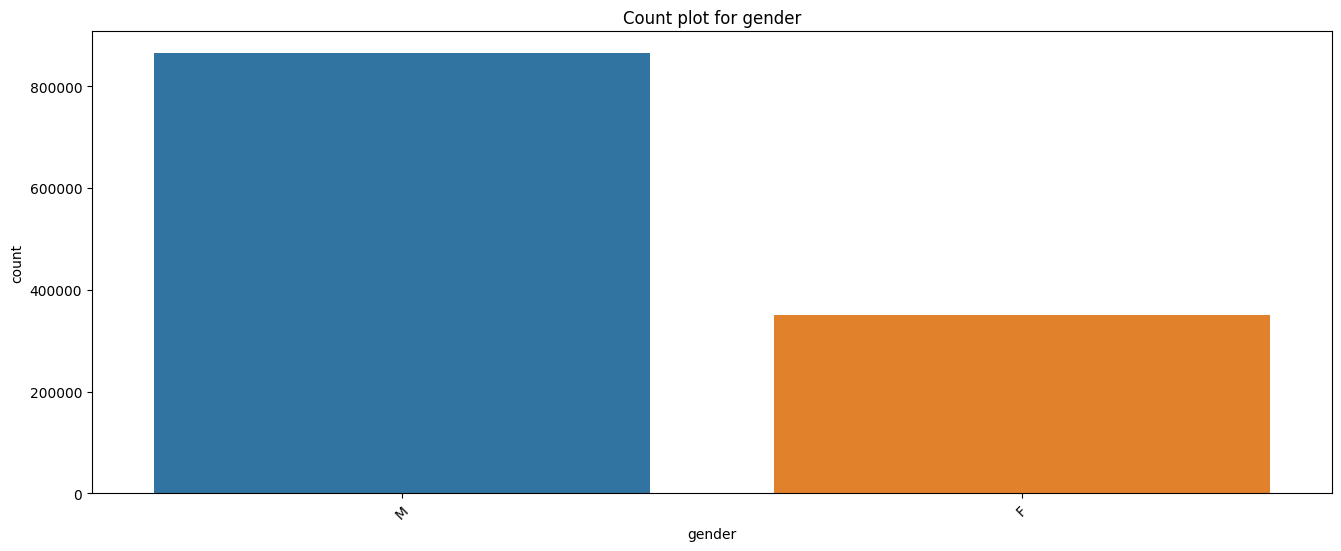

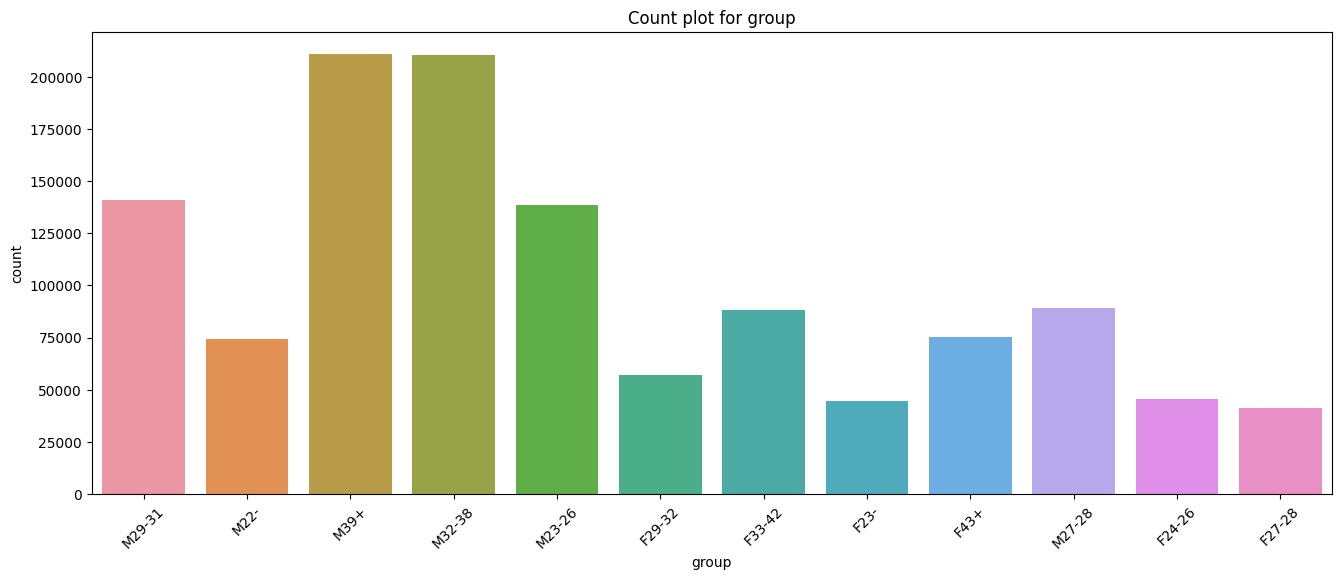

In [31]:
categorical_columns = ['gender', 'group']

for column in categorical_columns:
    plt.figure(figsize=(16, 6))
    sns.countplot(data=user_df, x=column)
    plt.xticks(rotation=45)
    plt.title(f'Count plot for {column}')
    plt.show()

#### **it is not feasible to visualize all the 89 brands so i am using only top 15 brands**

In [32]:
# it is not feasible to visualize all the 89 brands so i am using only top 15 brands
top_brands = user_df['phone_brand'].value_counts().head(15).index

user_df_top_brands = user_df[user_df['phone_brand'].isin(top_brands)]

In [33]:
user_df_top_brands.shape

(1180585, 7)

In [34]:
user_df_top_brands["device_model"]. nunique()

716

In [35]:
phone_translations = {
    '华为': 'Huawei',
    '小米': 'Xiaomi',
    '三星': 'Samsung',
    'vivo': 'Vivo',
    'OPPO': 'OPPO',
    '魅族': 'Meizu',
    '酷派': 'Coolpad',
    '乐视': 'LeEco',
    '联想': 'Lenovo',
    'HTC': 'HTC',
    '金立': 'Gionee',
    '中兴': 'ZTE',
    '努比亚': 'Nubia',
    '索尼': 'Sony',
    '中国移动': 'China Mobile'
}

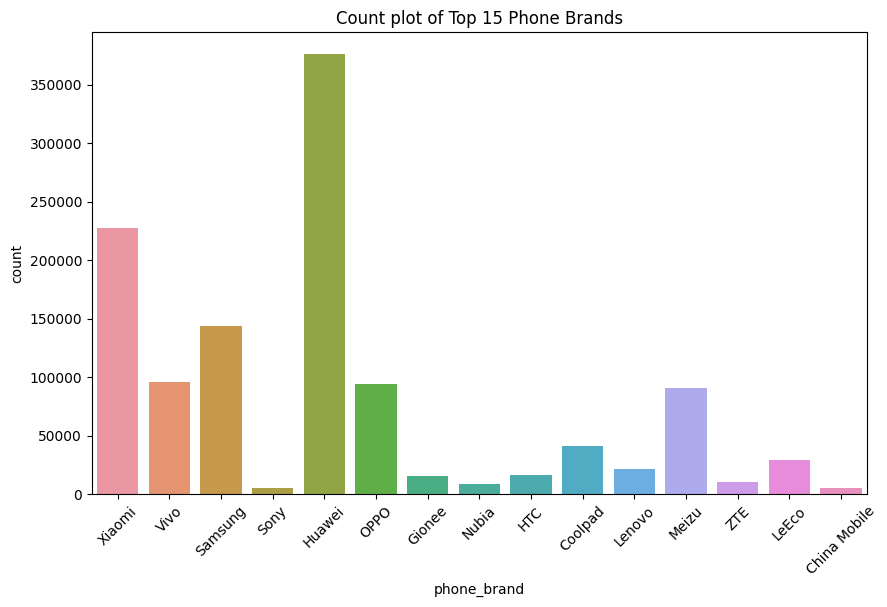

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=user_df_top_brands, x = user_df_top_brands["phone_brand"].replace(phone_translations))
plt.title("Count plot of Top 15 Phone Brands")
plt.xticks(rotation=45)
plt.show()

#### **same i am doing with the phone models taking top 20 models alone for feasibilty**

In [37]:
# same i am doing with the phone models taking top 20 models alone for feasibilty
top_models = user_df['device_model'].value_counts().head(20).index

user_df_top_models = user_df[user_df['device_model'].isin(top_models)]

In [38]:
user_df_top_models.shape

(497018, 7)

In [39]:
user_df_top_models["phone_brand"].replace(phone_translations).unique()

array(['Samsung', 'Huawei', 'Xiaomi', 'Meizu', 'OPPO'], dtype=object)

In [40]:
model_translations= {
    '荣耀6': 'Honor 6',
    '荣耀畅玩4X': 'Honor Play 4X',
    'Mate 7': 'Huawei Mate 7',
    'MI 4': 'Xiaomi Mi 4',
    '红米note': 'Redmi Note',
    '荣耀6 Plus': 'Honor 6 Plus',
    'Galaxy Note 3': 'Samsung Galaxy Note 3',
    '红米Note2': 'Redmi Note 2',
    '魅蓝Note 2': 'Meizu Blue Note 2',
    '荣耀畅玩4C': 'Honor Play 4C',
    'MI 3': 'Xiaomi Mi 3',
    'R7': 'OPPO R7',
    '荣耀3C': 'Honor 3C',
    'Ascend P8': 'Huawei Ascend P8',
    'MX5': 'Meizu MX5',
    'Galaxy Note 2': 'Samsung Galaxy Note 2',
    '小米note': 'Xiaomi Note',
    '魅蓝NOTE': 'Meizu Blue Note',
    '荣耀7': 'Honor 7',
    '红米2': 'Redmi 2'
}


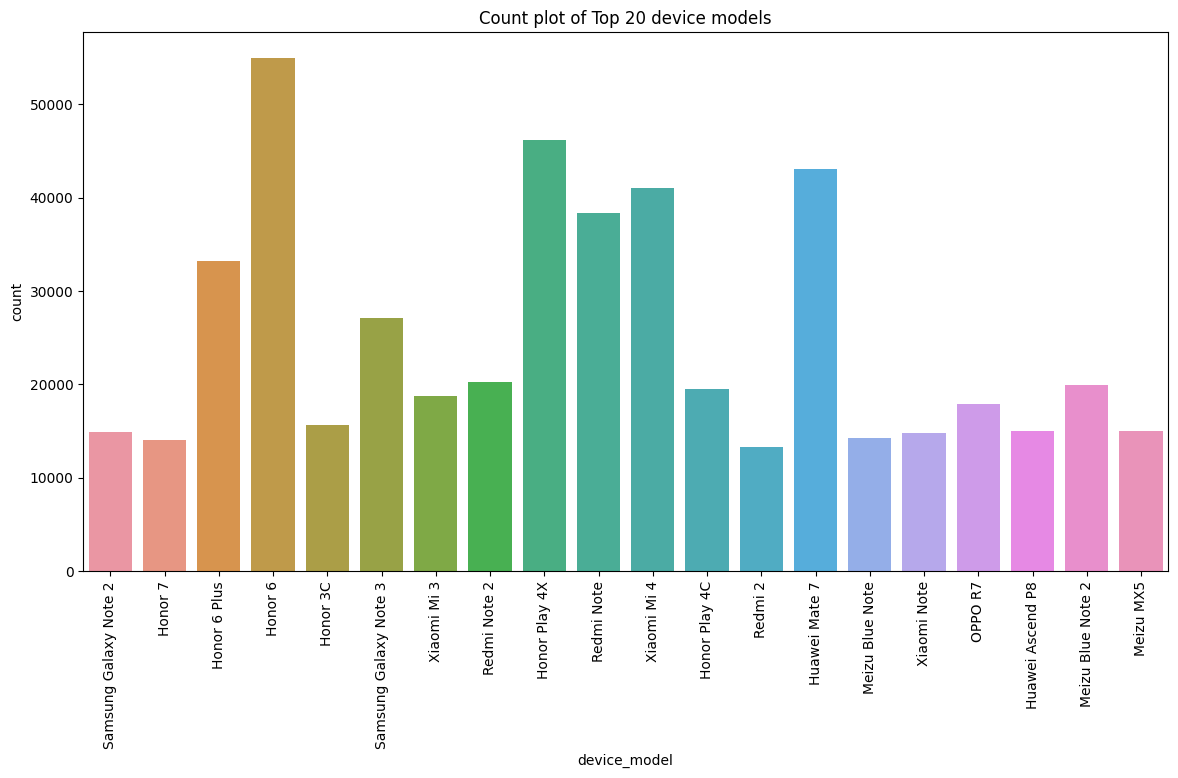

In [41]:
plt.figure(figsize=(14, 7))
sns.countplot(data=user_df_top_models, x = user_df_top_models["device_model"].replace(model_translations))
plt.title("Count plot of Top 20 device models")
plt.xticks(rotation=90)
plt.show()

### **Bivariate analysis:**

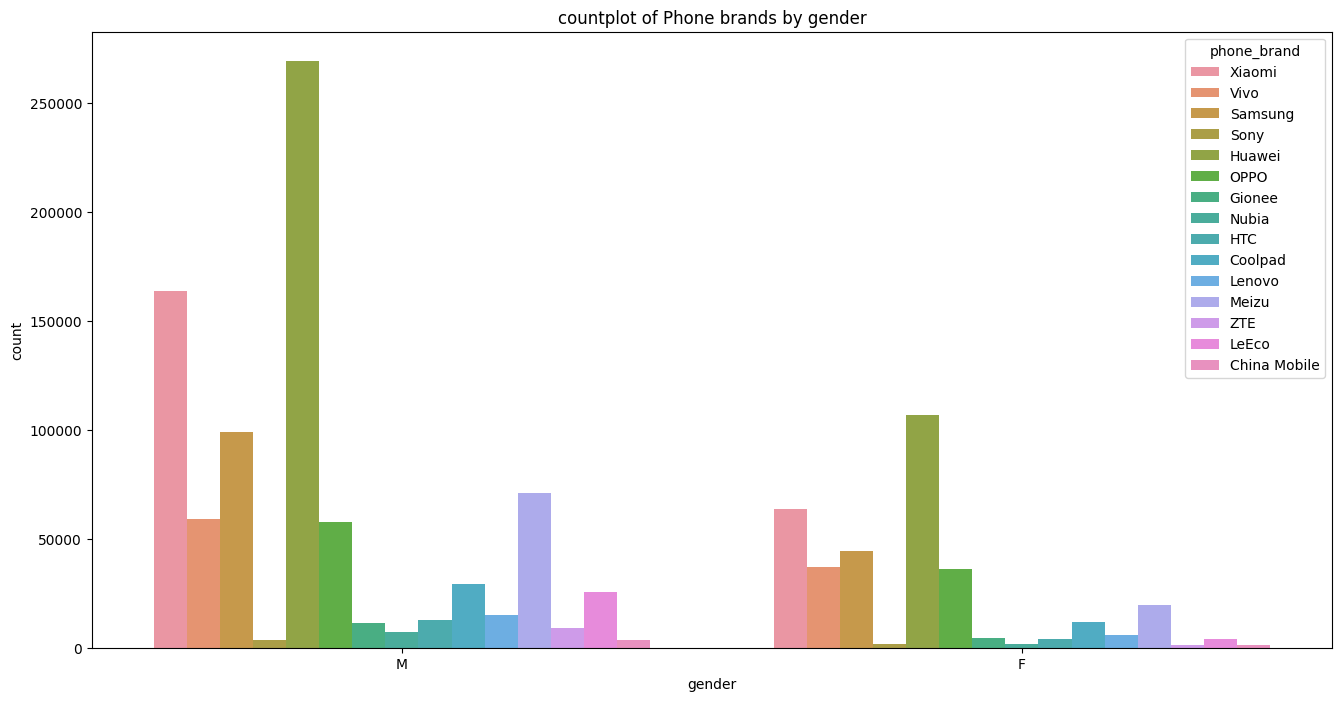

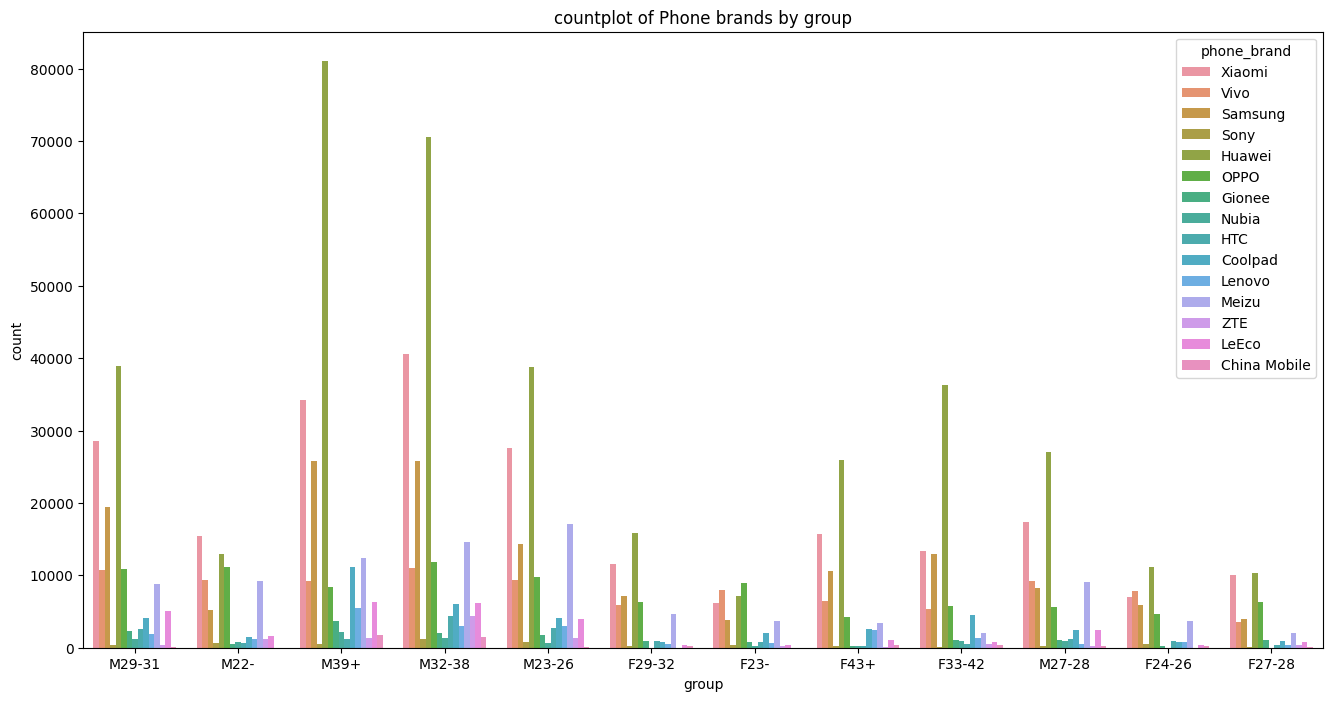

In [42]:
for column in categorical_columns:
    plt.figure(figsize=(16,8))
    sns.countplot(data = user_df_top_brands , x = column ,hue = user_df_top_brands["phone_brand"].replace(phone_translations))
    plt.title(f"countplot of Phone brands by {column}")

### **Insights From Data Visualization (both univariate as well as bivariate analysis):**

* There are more than **800000 male users** and close to **400000 female users**.

* Which is also evident that the **top 3 groups are male** dominated (M39+ ,M32-38 ,M29-31) .

* where this **two  groups (M39+ ,M32-38 )** alone accounts to **400000
users** approximately.

* it is evident that  that the **top 3** brands are **huawei** , **xiaomi** and **samsung** by **gender** as well as **group**(**gender and age**).

* as expected that The top device models also belong to those 3 brands specifically top 3 models are owned by huwaei alone
    1. **Honor 6**
    2. **honor play 4x**
    3. **huawei mate 7***
    
* overall most of the people uses **huawei , xiaomi , samsung , oppo , vivo and meizu**.

## **3. Data Preparation For Model Building**

### **Encoding The Categorical Variables:**

### **label encoding**

In [43]:
user_df.shape

(1215616, 7)

In [44]:
user_df.columns

Index(['phone_brand', 'device_model', 'longitude', 'latitude', 'gender', 'age',
       'group'],
      dtype='object')

In [45]:
from sklearn.preprocessing import LabelEncoder
encoded_df = user_df.copy()

label_encoders = {}

categorical_columns = ['phone_brand', 'device_model', 'gender', 'group']

for column in categorical_columns:
  label_encoders[column] = LabelEncoder()
  encoded_df[column] = label_encoders[column].fit_transform(encoded_df[column])

In [46]:
user_df.head()

,phone_brand,device_model,longitude,latitude,gender,age,group
0,小米,MI One Plus,0.00,0.00,M,30,M29-31
1,小米,MI One Plus,0.00,0.00,M,30,M29-31
2,小米,MI One Plus,0.00,0.00,M,30,M29-31
3,小米,MI One Plus,0.00,0.00,M,30,M29-31
4,小米,MI One Plus,0.00,0.00,M,30,M29-31


In [47]:
encoded_df .head()

,phone_brand,device_model,longitude,latitude,gender,age,group
0,34,410,0.00,0.00,1,30,9
1,34,410,0.00,0.00,1,30,9
2,34,410,0.00,0.00,1,30,9
3,34,410,0.00,0.00,1,30,9
4,34,410,0.00,0.00,1,30,9


In [48]:
encoded_df .shape

(1215616, 7)

### **standardizing or normalizing the data:**

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# numerical_columns = ["age", "longitude" ,"latitude"]

standardized_df = scaler.fit_transform(encoded_df )

In [50]:
encoded_df .head()

,phone_brand,device_model,longitude,latitude,gender,age,group
0,34,410,0.00,0.00,1,30,9
1,34,410,0.00,0.00,1,30,9
2,34,410,0.00,0.00,1,30,9
3,34,410,0.00,0.00,1,30,9
4,34,410,0.00,0.00,1,30,9


## **4. Principal Component Analysis And Clustering:**

#### **Applying PCA on the above dataset and determining the number of PCA components to be used, so that 90-95% of the variance in data is explained by the same:**

In [51]:
from sklearn.decomposition import PCA

In [52]:
# applying pca
pca = PCA()
pca.fit(standardized_df)

PCA()

In [53]:
# calculating cummulative variance ratio
cummulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

In [54]:
# number of components needed to explain 90-95% of the variance
n_components_90 = np.argmax(cummulative_variance_ratio >= 0.90) + 1
n_components_95 = np.argmax(cummulative_variance_ratio >= 0.95) + 1

In [55]:
print("Number of PCA components to explain 90% of the variance:", n_components_90)
print("Number of PCA components to explain 95% of the variance:", n_components_95)

Number of PCA components to explain 90% of the variance: 5
Number of PCA components to explain 95% of the variance: 5


In [56]:
pca = PCA(n_components = 5)
pca_df = pca.fit_transform(standardized_df)

#### **i ran the kmeans and silhouette score on whole dataset but its was running more than 3 hrs still i could not find it so i am randomly picking 200000 entries from the whole dataset to reduce the computaional time**

In [57]:
np.random.seed(32)
random_indices = np.random.choice(pca_df.shape[0],200000, replace=False)
pca_sample_nd_arr = pca_df[random_indices]

In [58]:
pca_sample_nd_arr.shape

(200000, 5)

### **K_Means_clustering**

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [60]:
# Function to find the optimal K value using the elbow method
def find_optimal_k(data, max_clusters=10):
    wcss = [] # within cluster sum of squares
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    # Plot the elbow curve
    plt.plot(range(1, max_clusters + 1), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()


In [61]:
# Function to build K-means clustering model using the optimal K value
def build_kmeans_model(data, optimal_k):
    kmeans = KMeans(n_clusters = optimal_k, init='k-means++', random_state=42)
    kmeans.fit(data)
    return kmeans

In [62]:
# Function to compute silhouette score
def compute_silhouette_score(data, labels):
    silhouette_avg = silhouette_score(data, labels)
    return silhouette_avg

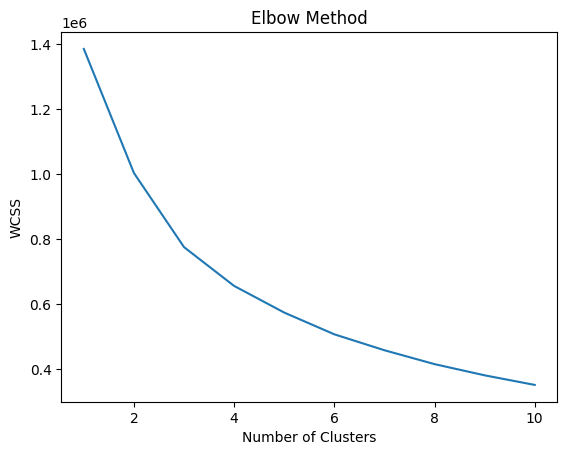

In [63]:
# Find the optimal K value using the elbow method
find_optimal_k(pca_sample_nd_arr)


In [64]:
# K-means clustering model using the obtained optimal K value =4 :

# based on the elbow plot
optimal_k_4 = 4
kmeans_model = build_kmeans_model(pca_sample_nd_arr, optimal_k_4)

In [65]:
# silhouette score for evaluating the quality of the K-means clustering technique:

kmeans_labels = kmeans_model.labels_
silhouette_score_kmeans = compute_silhouette_score(pca_sample_nd_arr, kmeans_labels)
print("Silhouette Score for K-means Clustering:", silhouette_score_kmeans)

Silhouette Score for K-means Clustering: 0.3752236494997669


In [66]:
pca_sample_nd_arr.shape

(200000, 5)

In [67]:
# K-means clustering model using the obtained optimal K value = 6 :
optimal_k_6 = 6
kmeans_model = build_kmeans_model(pca_sample_nd_arr, optimal_k_6)

In [68]:
# silhouette score for evaluating the quality of the K-means clustering technique:

kmeans_labels = kmeans_model.labels_
silhouette_score_kmeans = compute_silhouette_score(pca_sample_nd_arr, kmeans_labels)
print("Silhouette Score for K-means Clustering:", silhouette_score_kmeans)

Silhouette Score for K-means Clustering: 0.33899819242040363


#### as the silhouette score for k value = 4 (**0.3752**) is higher than k value = 6 (**0.3390**) so i am going with **optimal k value = 4**

### **Agglomerative clustering:**

In [69]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [70]:
pca_df.shape

(1215616, 5)

#### **as the notebook was crashing for even (200000,5) entries i am randomly picking only (30000,5) entries which is 2.5% of the whole dataset with the shape of (1215616, 5)**

In [71]:
# Sample dataset for Agglomerative clustering
np.random.seed(42)
random_indices = np.random.choice(pca_df.shape[0],30000, replace=False)
pca_sample  = pca_df[random_indices]

In [72]:
# Computing linkage matrix
linkage_matrix = linkage(pca_sample , method='ward')

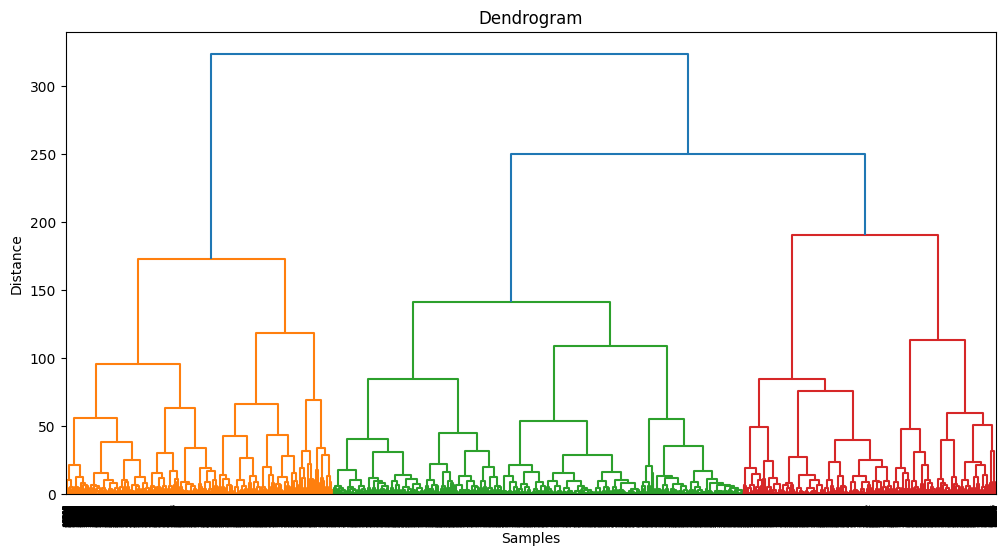

In [73]:
# dendrogram plot:
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

#### **From the dendrogram we can see the optimal number of clusters k = 2**

In [74]:
# Agglomerative clustering model
optimal_k = 2  # Adjust based on the dendrogram
agglomerative_model = AgglomerativeClustering(n_clusters = optimal_k)
agglomerative_model.fit(pca_sample)

AgglomerativeClustering()

In [75]:
# Computing the silhouette score
agglomerative_labels = agglomerative_model.labels_
silhouette_score_agglomerative = silhouette_score(pca_sample, agglomerative_labels)
print("Silhouette Score for Agglomerative Clustering:", silhouette_score_agglomerative)


Silhouette Score for Agglomerative Clustering: 0.30488052793690534


#### **Silhouette Score for Agglomerative Clustering: 0.2743660488722122**

## **5. Conclusion (Insights From Cluster Analysis )**

### **adding k means cluster labels to the user_df:**

In [76]:
user_df_with_k_labels = user_df.sample(n=200000, random_state=32).copy()
user_df_with_k_labels['cluster_label'] = kmeans_labels  # Adding the cluster labels as a new column

# Now user_df_with_labels contains the original data with cluster labels added
print(user_df_with_k_labels.head())

       phone_brand device_model  longitude  latitude gender  age   group  \
309178          华为         荣耀3C     117.76     38.29      F   25  F24-26   
949924          小米      红米Note2     116.74     39.59      M   43    M39+   
104822          小米         红米1S       0.00      0.00      M   45    M39+   
606140          小米       小米note     104.13     30.69      M   28  M27-28   
280732          魅族          MX5       0.00      0.00      F   19    F23-   

        cluster_label  
309178              3  
949924              0  
104822              2  
606140              0  
280732              1  


### **adding agglomerative means cluster labels to the user_df:**

In [77]:
user_df_with_agg_labels = user_df.sample(n=30000, random_state = 42).copy()
user_df_with_agg_labels['cluster_label'] = agglomerative_labels  # Adding the cluster labels as a new column

# Now user_df_with_labels contains the original data with cluster labels added
print(user_df_with_agg_labels.head())

       phone_brand device_model  longitude  latitude gender  age   group  \
503502          小米          红米2     104.00     30.00      M   35  M32-38   
959168          小米      红米Note2     117.01     25.08      M   38  M32-38   
597770          华为         G521       0.00      0.00      M   26  M23-26   
937974          一加          One     108.34     22.86      M   28  M27-28   
203889        OPPO          A31     117.21     29.28      F   49    F43+   

        cluster_label  
503502              0  
959168              0  
597770              0  
937974              0  
203889              1  


 ### **bivariate analysis between k means cluster and the other features**

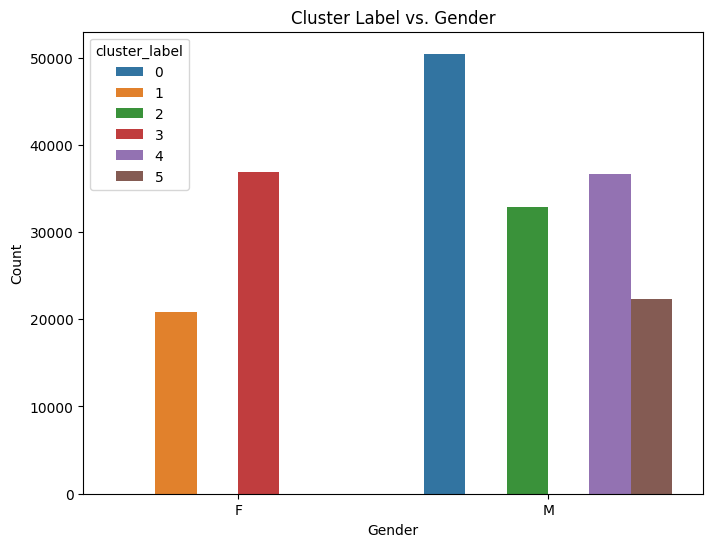

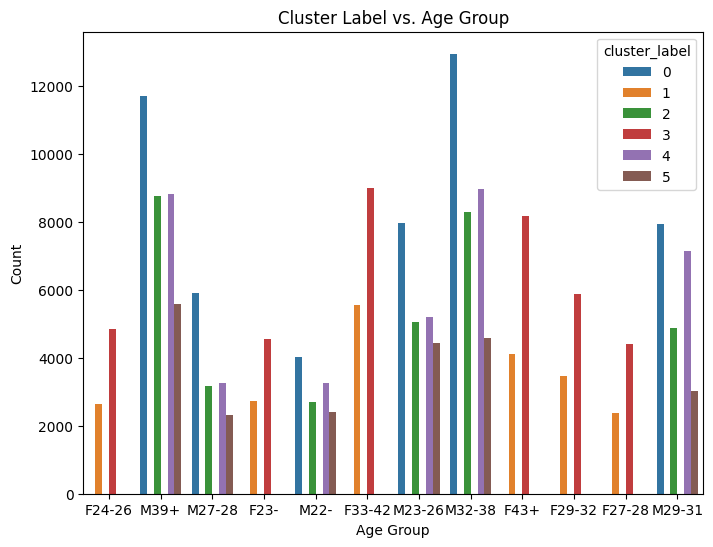

In [78]:
# Bivariate analysis between cluster label and gender

plt.figure(figsize=(8, 6))
sns.countplot(data=user_df_with_k_labels, x='gender', hue='cluster_label')
plt.title('Cluster Label vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Bivariate analysis between cluster label and age group

plt.figure(figsize=(8, 6))
sns.countplot(data = user_df_with_k_labels, x='group', hue='cluster_label')
plt.title('Cluster Label vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


In [110]:
top_brands_cluster_df = user_df_with_k_labels[user_df_with_k_labels["phone_brand"].isin(user_df_top_brands["phone_brand"])]
top_brands_cluster_df["phone_brand"]=top_brands_cluster_df["phone_brand"].replace(phone_translations)
top_brands_cluster_df.head()

,phone_brand,device_model,longitude,latitude,gender,age,group,cluster_label
309178,Huawei,荣耀3C,117.76,38.29,F,25,F24-26,3
949924,Xiaomi,红米Note2,116.74,39.59,M,43,M39+,0
104822,Xiaomi,红米1S,0.00,0.00,M,45,M39+,2
606140,Xiaomi,小米note,104.13,30.69,M,28,M27-28,0
280732,Meizu,MX5,0.00,0.00,F,19,F23-,1


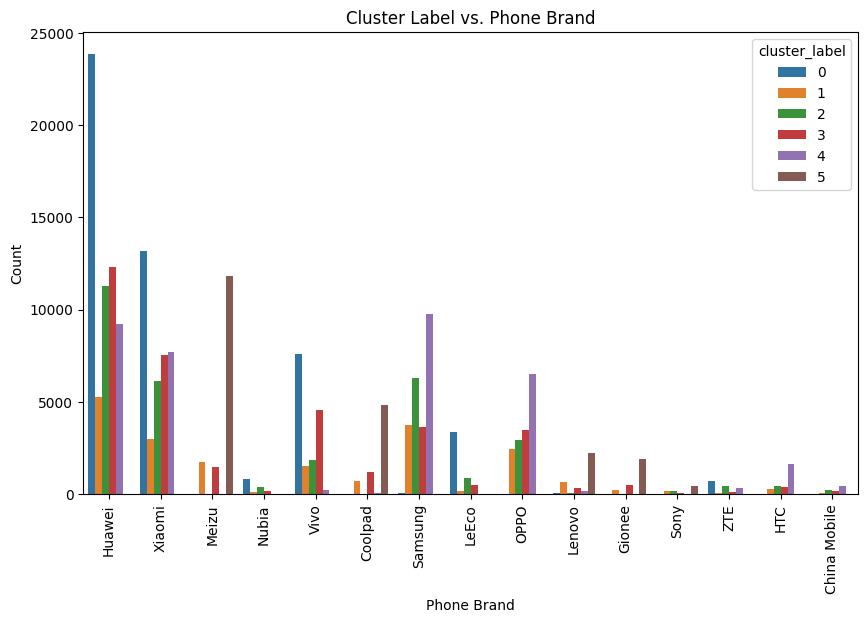

In [111]:
# Bivariate analysis between cluster label and phone brand

plt.figure(figsize=(10, 6))
sns.countplot(data= top_brands_cluster_df, x = "phone_brand" , hue='cluster_label')
plt.title('Cluster Label vs. Phone Brand')
plt.xlabel('Phone Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [115]:
top_models_cluster_df = user_df_with_k_labels[user_df_with_k_labels["device_model"].isin(user_df_top_models["device_model"])]
top_models_cluster_df["device_model"] = top_models_cluster_df["device_model"].replace(model_translations)
top_models_cluster_df.head()

,phone_brand,device_model,longitude,latitude,gender,age,group,cluster_label
309178,华为,Honor 3C,117.76,38.29,F,25,F24-26,3
949924,小米,Redmi Note 2,116.74,39.59,M,43,M39+,0
606140,小米,Xiaomi Note,104.13,30.69,M,28,M27-28,0
280732,魅族,Meizu MX5,0.00,0.00,F,19,F23-,1
347717,华为,Honor 7,0.00,0.00,F,42,F33-42,1


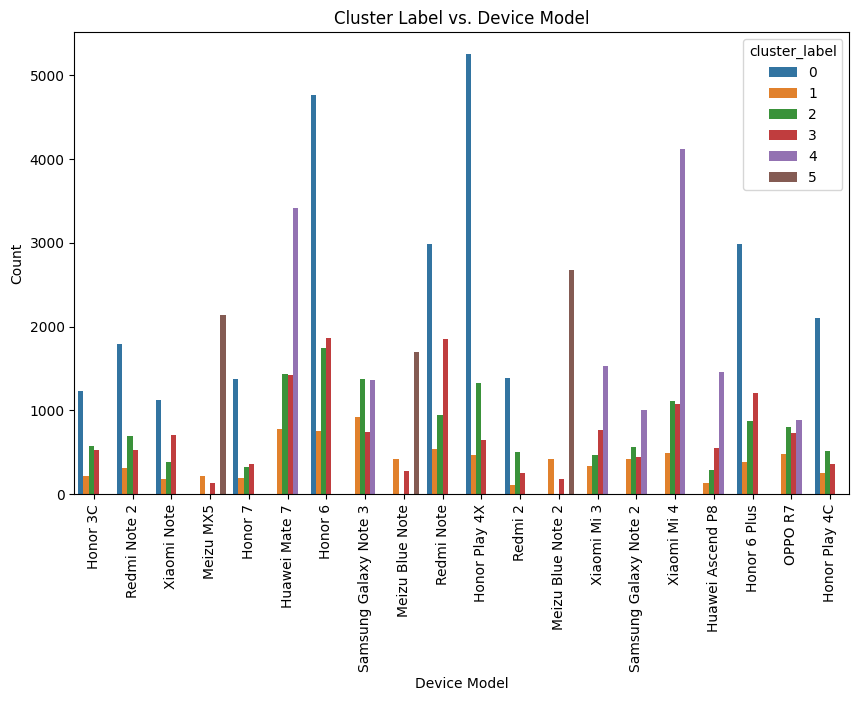

In [116]:
# Bivariate analysis between cluster label and device model

plt.figure(figsize=(10, 6))
sns.countplot(data=top_models_cluster_df, x = "device_model", hue='cluster_label')
plt.title('Cluster Label vs. Device Model')
plt.xlabel('Device Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### **Insights from Cluster-wise Bivariate Analysis:**

do note that the bivariate analysis  had done on  k means clusters.

* majority of the **0th cluster** people uses **honor 6** , **honor play 4x , honor 6 plus and redmi note**

* majority of the **4th cluster** people uses  **xiaomi mi 4 and huawei mate 7**

* suprisingly we can see the more than **10000** people uses meizu which is a significant number that is single handedly coming from **5th cluster** so we can say that **5th cluster people** are **meizu enthusiasts**.

* **clusters 1 , 2 and 3** is  mix of every brands but majority are from **huawei , xiaomi , samsung , oppo and vivo** 

* it was evident that the **female** people comes under the **clusters 1 and 3** , **male** people comes under **clusters 0, 2, 4 and 5.**



*These insights can be used to understand the characteristics of each cluster and to develop targeted marketing strategies.* For example, **we can target ads more on the active clusters(comaparitively more smartphone users) 0 and 4. and also attracts people from 5 th cluster where almost everyone uses meizu**


### **Insights From Statstical Summary:**


*   There are **89** unique Phone Brands and **926** Phone models
*   There are 12 groups among them m39+ is top group.
*   Top phone brand is 华为	**(Huawei)** and top model is 荣耀6 **(Honor 6)**.
*   The **mean** age of people using phones is **33.50 years old**, while the **median** age is **31 years**."
* **minimum age** of the people using phones is **11 years** and the **maximum age** of the people using the phone is **89 years**.

### **Insights From Data Visualization (both univariate as well as bivariate analysis):**

* There are more than **800000 male users** and close to **400000 female users**.

* Which is also evident that the **top 3 groups are male** dominated (M39+ ,M32-38 ,M29-31) .

* where this **two  groups (M39+ ,M32-38 )** alone accounts to **400000
users** approximately.

* it is evident that  that the **top 3** brands are **huawei** , **xiaomi** and **samsung** by **gender** as well as **group**(**gender and age**).

* as expected that The top device models also belong to those 3 brands specifically top 3 models are owned by huwaei alone
    1. **Honor 6**
    2. **honor play 4x**
    3. **huawei mate 7**
    
* overall most of the people uses **huawei , xiaomi , samsung , oppo , vivo and meizu**.